<a href="https://colab.research.google.com/github/nahin333/potato-diseases/blob/main/training_using_image_data_generator_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
!pip install split-folders

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import splitfolders

splitfolders.ratio("/content/drive/My Drive/PlantVillage", output="/content/drive/My Drive/PlantVillage_split_data",
    seed=1337, ratio=(.8, .1, .1))

Copying files: 2152 files [00:33, 64.61 files/s]


In [22]:
IMAGE_SIZE = 256
CHANNELS = 3

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/PlantVillage_split_data/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        #save_to_dir = '/content/drive/My Drive/augmented_data'
)

Found 1721 images belonging to 3 classes.


In [24]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [25]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [26]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.57956123 0.56387496 0.6187769 ]
  [0.48842478 0.4727385  0.52764046]
  [0.5249855  0.5092992  0.5642012 ]
  ...
  [0.6133063  0.59762    0.65644354]
  [0.6116175  0.59593123 0.65475476]
  [0.6099287  0.59424245 0.653066  ]]

 [[0.5840646  0.5683783  0.6232803 ]
  [0.5041867  0.48850045 0.5434024 ]
  [0.513164   0.4974777  0.55237967]
  ...
  [0.60467434 0.58898807 0.6478116 ]
  [0.60523725 0.589551   0.64837456]
  [0.60580015 0.5901139  0.6489374 ]]

 [[0.58856803 0.57288176 0.6277837 ]
  [0.51994866 0.5042624  0.55916435]
  [0.50134254 0.4856563  0.5405583 ]
  ...
  [0.6085553  0.59286904 0.65169257]
  [0.6091182  0.59343195 0.6522555 ]
  [0.6096812  0.5939949  0.65281844]]

 ...

 [[0.5983599  0.5748305  0.6218893 ]
  [0.582598   0.55906856 0.6061274 ]
  [0.566836   0.5433066  0.5903654 ]
  ...
  [0.70034057 0.69249743 0.7356347 ]
  [0.6968037  0.68896055 0.7320978 ]
  [0.78077286 0.77292967 0.816067  ]]

 [[0.5316241  0.50809467 0.5551535 ]
  [0.53950506 0.5159756  0.5630345 ]


In [27]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/PlantVillage_split_data/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [28]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/PlantVillage_split_data/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [29]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.56078845 0.50980806 0.5451022 ]
  [0.5686234  0.51764303 0.55293715]
  [0.56471205 0.5137316  0.5490257 ]
  ...
  [0.64443475 0.6130622  0.6640426 ]
  [0.6417483  0.61037576 0.66135615]
  [0.6391132  0.6077406  0.658721  ]]

 [[0.55936813 0.50838774 0.54368186]
  [0.5682652  0.5172848  0.5525789 ]
  [0.5648911  0.5139107  0.5492048 ]
  ...
  [0.60352033 0.5721478  0.6231282 ]
  [0.6017294  0.5703568  0.62133723]
  [0.60011095 0.5687384  0.61971885]]

 [[0.55793536 0.50695497 0.5422491 ]
  [0.56790704 0.51692665 0.55222076]
  [0.5650702  0.5140898  0.54938394]
  ...
  [0.6641781  0.6328055  0.6837859 ]
  [0.66740185 0.63602924 0.6870097 ]
  [0.67053854 0.639166   0.6901464 ]]

 ...

 [[0.62391496 0.5650914  0.5846992 ]
  [0.6163929  0.5575693  0.57717717]
  [0.60887086 0.5500473  0.5696551 ]
  ...
  [0.73333335 0.6862745  0.69411767]
  [0.7368845  0.68982565 0.6976688 ]
  [0.7564719  0.70941305 0.7172562 ]]

 [[0.48063347 0.4218099  0.44141775]
  [0.4836781  0.42485455 0.4444624 ]


In [30]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [31]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=53,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
53/53 [==============================] - 41s 759ms/step - loss: 0.8816 - accuracy: 0.4902 - val_loss: 0.7639 - val_accuracy: 0.6979
Epoch 2/20
53/53 [==============================] - 39s 727ms/step - loss: 0.5617 - accuracy: 0.7543 - val_loss: 0.3920 - val_accuracy: 0.8542
Epoch 3/20
53/53 [==============================] - 39s 735ms/step - loss: 0.2974 - accuracy: 0.8834 - val_loss: 0.4637 - val_accuracy: 0.8125
Epoch 4/20
53/53 [==============================] - 38s 719ms/step - loss: 0.2377 - accuracy: 0.9059 - val_loss: 0.2359 - val_accuracy: 0.9167
Epoch 5/20
53/53 [==============================] - 38s 709ms/step - loss: 0.2481 - accuracy: 0.9118 - val_loss: 0.3365 - val_accuracy: 0.8750
Epoch 6/20
53/53 [==============================] - 37s 689ms/step - loss: 0.1351 - accuracy: 0.9520 - val_loss: 0.1530 - val_accuracy: 0.9219
Epoch 7/20
53/53 [==============================] - 37s 689ms/step - loss: 0.1267 - accuracy: 0.9520 - val_loss: 0.1478 - val_accuracy: 0.9427

In [35]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 5s 675ms/step - loss: 0.1065 - accuracy: 0.9630


In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

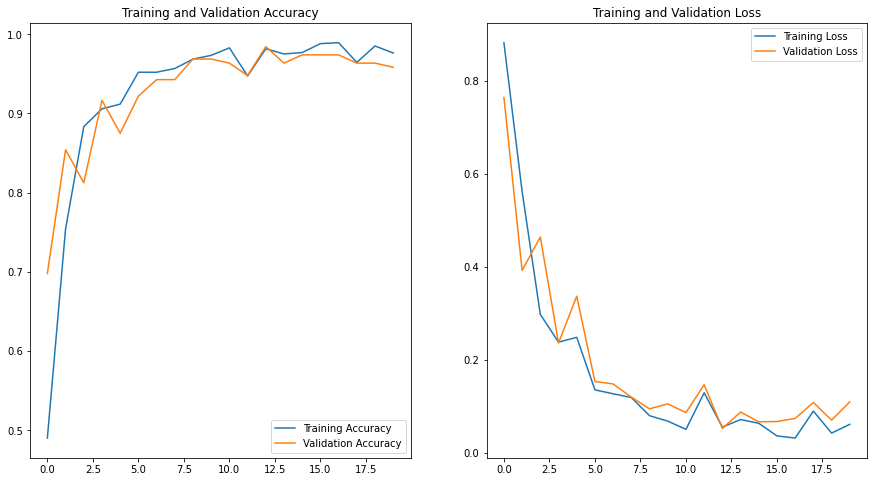

In [39]:
EPOCHS = 20

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


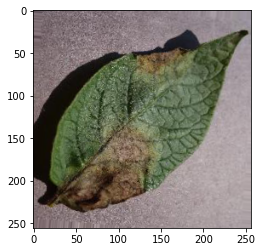

In [44]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

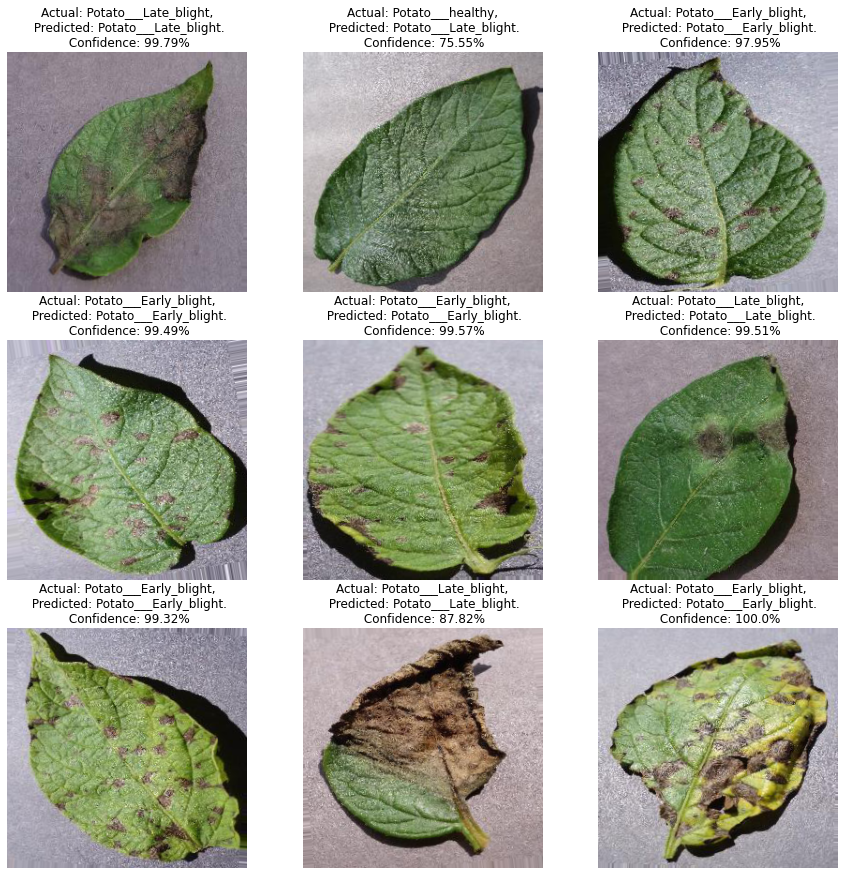

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [47]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/My Drive/PlantVillage_models") + [0]])+1
model.save(f"/content/drive/My Drive/PlantVillage_models/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/My Drive/PlantVillage_models/2/assets
